# Process of results

First some imports

In [1]:
import os
import os.path

from gravann.input import csv_reader
from gravann.functions import unit_conversion

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ast
import warnings
warnings.filterwarnings('ignore')

Next, we read all finalized CSV files from the given `input_directory`:

In [2]:
input_directory = Path("./results/eros")
output_directory = Path("./results/eros")

# Error of interest
error_of_interest = "relRMSE"

df = csv_reader.read_result_csv(
    input_directory,
    include=["results.csv"],
    exclude=["checkpoint", "validation"]
)
analysis_df = df.copy()

Let's look at the initial result

In [3]:
df

,sample,output_folder,run_id,plotting_points,seed,ground_truth,loss,batch_size,learning_rate,iterations,...,RMSE@Altitude_9,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude
0,eros,results/polyhedral-total-eros-seed-3,0,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,8.833966e-09,0.000023,0.022943,0.018008,0.084294,0.021020,0.068688,0.044827,0.362498,0.075549
1,eros,results/polyhedral-total-eros-seed-3,1,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,1.490945e-08,0.000038,1.139191,0.903554,4.237850,1.108131,1.569809,1.045544,5.534481,1.244159
2,eros,results/polyhedral-total-eros-seed-3,2,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,7.500763e-09,0.000019,1.177181,0.931986,4.305924,1.122898,1.654619,1.100991,5.691825,1.269383
3,eros,results/polyhedral-total-eros-seed-3,3,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,1.277451e-08,0.000033,0.021181,0.016711,0.083385,0.021044,0.067955,0.044206,0.436315,0.096756
4,eros,results/polyhedral-total-eros-seed-3,4,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,1.097964e-07,0.000280,1.020040,0.814171,4.025208,1.052944,1.409534,0.936191,5.242249,1.181547
5,eros,results/polyhedral-total-eros-seed-3,5,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,1.069537e-07,0.000273,1.364802,1.095192,4.740924,1.245826,1.871383,1.252317,6.155675,1.372250
6,eros,results/polyhedral-total-eros-seed-3,6,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,2.726456e-08,0.000070,0.029977,0.023377,0.112388,0.027906,0.104990,0.067979,0.721352,0.148614
7,eros,results/polyhedral-total-eros-seed-3,7,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,2.373113e-07,0.000606,1.270343,1.010561,4.592882,1.188108,1.704347,1.139758,5.843379,1.311284
8,eros,results/polyhedral-total-eros-seed-3,8,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,8.467135e-07,0.002159,1.198524,0.972224,4.089046,1.087548,1.516542,1.013471,5.138883,1.140220
9,eros,results/polyhedral-total-eros-seed-3,9,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,4.392911e-08,0.000112,0.026693,0.021167,0.093239,0.023605,0.056779,0.037276,0.280999,0.058583


And save the unmodified concatenated DataFrame to a file

In [4]:
filename = "total_results_cg.csv"
df.to_csv(output_directory.joinpath(filename))

# Processing and Data Visualization

First, we drop every uninteresting parameter and focus on the selected error. Further, we rember the used altitudes for validation.

In [5]:
interesting_columns = ["sample", "seed", "ground_truth", "sample_domain", "noise"]
interesting_columns.extend([col for col in df if col.startswith(error_of_interest)])

analysis_df = analysis_df[interesting_columns]
analysis_df = analysis_df.fillna("None")
analysis_df

,sample,seed,ground_truth,sample_domain,noise,relRMSE@Altitude_0,relRMSE@Altitude_1,relRMSE@Altitude_2,relRMSE@Altitude_3,relRMSE@Altitude_4,relRMSE@Altitude_5,relRMSE@Altitude_6,relRMSE@Altitude_7,relRMSE@Altitude_8,relRMSE@Altitude_9,relRMSE@High Altitude,relRMSE@Low Altitude
0,eros,3,polyhedral,"[0.0, 1.0]",[''],0.136224,0.065858,0.053464,0.020733,0.011846,0.003358,0.003138,0.000209,0.000109,0.000023,0.021020,0.075549
1,eros,3,polyhedral,"[1.0, 3.0]",[''],0.843913,0.907147,0.736556,0.738586,0.726699,0.380245,0.021204,0.000370,0.000189,0.000038,1.108131,1.244159
2,eros,3,polyhedral,"[3.0, 5.0]",[''],0.959789,0.866744,0.994346,0.743425,1.111881,0.441415,0.043682,0.000189,0.000093,0.000019,1.122898,1.269383
3,eros,3,polyhedral,"[0.0, 1.0]","['gaussian', 0.0, 0.009337]",0.089021,0.112469,0.083767,0.019142,0.016322,0.004454,0.003371,0.000295,0.000154,0.000033,0.021044,0.096756
4,eros,3,polyhedral,"[1.0, 3.0]","['gaussian', 0.0, 0.009337]",1.452371,0.763433,1.248707,1.145711,0.708602,0.430060,0.047539,0.002635,0.001335,0.000280,1.052944,1.181547
5,eros,3,polyhedral,"[3.0, 5.0]","['gaussian', 0.0, 0.009337]",1.192261,1.331591,1.260250,0.935856,1.255232,0.671131,0.344998,0.005279,0.001736,0.000273,1.245826,1.372250
6,eros,3,polyhedral,"[0.0, 1.0]","['gaussian', 0.0, 0.093371]",0.160906,0.106930,0.076425,0.027216,0.016341,0.007755,0.007195,0.000698,0.000340,0.000070,0.027906,0.148614
7,eros,3,polyhedral,"[1.0, 3.0]","['gaussian', 0.0, 0.093371]",1.347988,0.819884,0.829861,0.795839,0.808592,0.526048,0.157199,0.006654,0.003102,0.000606,1.188108,1.311284
8,eros,3,polyhedral,"[3.0, 5.0]","['gaussian', 0.0, 0.093371]",1.091268,1.469348,1.155938,1.199963,0.990613,0.577373,0.266755,0.022152,0.010649,0.002159,1.087548,1.140220
9,eros,3,polyhedral,"[0.0, 1.0]","['constant_bias', [9.79917e-05, 0.0, 0.0]]",0.066327,0.069178,0.054399,0.023933,0.017773,0.006708,0.004587,0.001027,0.000537,0.000112,0.023605,0.058583


Time to replace the altitudes and make them more readable:

In [16]:
ALTITUDES = ast.literal_eval(df.at[0, "validation_sampling_altitudes"])
print(ALTITUDES)

print(unit_conversion.convert_altitude("eros", np.array([1.0, 3.0, 5.0]), unit='km'))

[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]
[ 20.41386485  61.24159455 102.06932425]


In [7]:
unit_conversion.convert_pandas_altitudes(analysis_df, ALTITUDES, convert_height=False, only_height=True)
analysis_df

,sample,seed,ground_truth,sample_domain,noise,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,relRMSE@High Altitude,relRMSE@Low Altitude
0,eros,3,polyhedral,"[0.0, 1.0]",[''],0.136224,0.065858,0.053464,0.020733,0.011846,0.003358,0.003138,0.000209,0.000109,0.000023,0.021020,0.075549
1,eros,3,polyhedral,"[1.0, 3.0]",[''],0.843913,0.907147,0.736556,0.738586,0.726699,0.380245,0.021204,0.000370,0.000189,0.000038,1.108131,1.244159
2,eros,3,polyhedral,"[3.0, 5.0]",[''],0.959789,0.866744,0.994346,0.743425,1.111881,0.441415,0.043682,0.000189,0.000093,0.000019,1.122898,1.269383
3,eros,3,polyhedral,"[0.0, 1.0]","['gaussian', 0.0, 0.009337]",0.089021,0.112469,0.083767,0.019142,0.016322,0.004454,0.003371,0.000295,0.000154,0.000033,0.021044,0.096756
4,eros,3,polyhedral,"[1.0, 3.0]","['gaussian', 0.0, 0.009337]",1.452371,0.763433,1.248707,1.145711,0.708602,0.430060,0.047539,0.002635,0.001335,0.000280,1.052944,1.181547
5,eros,3,polyhedral,"[3.0, 5.0]","['gaussian', 0.0, 0.009337]",1.192261,1.331591,1.260250,0.935856,1.255232,0.671131,0.344998,0.005279,0.001736,0.000273,1.245826,1.372250
6,eros,3,polyhedral,"[0.0, 1.0]","['gaussian', 0.0, 0.093371]",0.160906,0.106930,0.076425,0.027216,0.016341,0.007755,0.007195,0.000698,0.000340,0.000070,0.027906,0.148614
7,eros,3,polyhedral,"[1.0, 3.0]","['gaussian', 0.0, 0.093371]",1.347988,0.819884,0.829861,0.795839,0.808592,0.526048,0.157199,0.006654,0.003102,0.000606,1.188108,1.311284
8,eros,3,polyhedral,"[3.0, 5.0]","['gaussian', 0.0, 0.093371]",1.091268,1.469348,1.155938,1.199963,0.990613,0.577373,0.266755,0.022152,0.010649,0.002159,1.087548,1.140220
9,eros,3,polyhedral,"[0.0, 1.0]","['constant_bias', [9.79917e-05, 0.0, 0.0]]",0.066327,0.069178,0.054399,0.023933,0.017773,0.006708,0.004587,0.001027,0.000537,0.000112,0.023605,0.058583


In [15]:
unit_conversion.convert_altitude("eros", np.array(ALTITUDES), unit='km')

array([2.04138649e-02, 1.02069324e-01, 2.04138649e-01, 1.02069324e+00,
       2.04138649e+00, 1.02069324e+01, 2.04138649e+01, 1.02069324e+02,
       2.04138649e+02, 1.02069324e+03])

In [9]:
analysis_df = analysis_df.drop(
    ["sample", "seed", f"{error_of_interest}@High Altitude", f"{error_of_interest}@Low Altitude"], axis=1
)
analysis_df["sample_domain"] = analysis_df["sample_domain"].apply(lambda x: str(x))
analysis_df.groupby(["sample_domain", "noise", "ground_truth"]).mean()

0.001  \
sample_domain noise                                              ground_truth             
[0. 1.]       ['']                                               mascon        0.107521   
                                                                 polyhedral    0.136224   
              ['combined', 0.0, 0.009337, [9.79917e-05, 0.0, ... mascon        0.112874   
                                                                 polyhedral    0.074222   
              ['combined', 0.0, 0.093371, [9.79917e-05, 0.0, ... mascon        0.203144   
                                                                 polyhedral    0.118689   
              ['constant_bias', [9.79917e-05, 0.0, 0.0]]         mascon        0.094548   
                                                                 polyhedral    0.066327   
              ['gaussian', 0.0, 0.009337]                        mascon        0.200421   
                                                                 polyhedral    0.089021   
              ['gaussian', 0.0, 0.093371]                        mascon        0.227639   
                                                                 polyhedral    0.160906   
[1. 3.]       ['']                                               mascon        0.808580   
                                                                 polyhedral    0.843913   
              ['combined', 0.0, 0.009337, [9.79917e-05, 0.0, ... mascon        0.850383   
                                                                 polyhedral    0.875497   
              ['combined', 0.0, 0.093371, [9.79917e-05, 0.0, ... mascon        1.401517   
                                                                 polyhedral    1.385566   
              ['constant_bias', [9.79917e-05, 0.0, 0.0]]         mascon        0.792949   
                                                                 polyhedral    1.146196   
              ['gaussian', 0.0, 0.009337]                        mascon        0.702368   
                                                                 polyhedral    1.452371   
              ['gaussian', 0.0, 0.093371]                        mascon        1.246607   
                                                                 polyhedral    1.347988   
[3. 5.]       ['']                                               mascon        0.963099   
                                                                 polyhedral    0.959789   
              ['combined', 0.0, 0.009337, [9.79917e-05, 0.0, ... mascon        0.931066   
                                                                 polyhedral    0.996823   
              ['combined', 0.0, 0.093371, [9.79917e-05, 0.0, ... mascon        1.071848   
                                                                 polyhedral    1.026159   
              ['constant_bias', [9.79917e-05, 0.0, 0.0]]         mascon        1.134381   
                                                                 polyhedral    0.871209   
              ['gaussian', 0.0, 0.009337]                        mascon        1.053155   
                                                                 polyhedral    1.192261   
              ['gaussian', 0.0, 0.093371]                        mascon        1.119334   
                                                                 polyhedral    1.091268   

                                                                                  0.005  \
sample_domain noise                                              ground_truth             
[0. 1.]       ['']                                               mascon        0.072274   
                                                                 polyhedral    0.065858   
              ['combined', 0.0, 0.009337, [9.79917e-05, 0.0, ... mascon        1.347163   
                                                                 polyhedral    0.060376   
              ['combined', 0.0, 0.093371, [9.79917e-05, 0.0, ... mascon      

Time for plotting. First make the DataFrame wide

In [10]:
str_altitudes = [str(x) for x in ALTITUDES]

dfm = analysis_df.melt(["sample_domain", "noise", "ground_truth"], str_altitudes, var_name="distance", value_name=error_of_interest)

dfm["distance"] = dfm["distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))
dfm

,sample_domain,noise,ground_truth,distance,relRMSE
0,[0. 1.],[''],polyhedral,0.001,0.136224
1,[1. 3.],[''],polyhedral,0.001,0.843913
2,[3. 5.],[''],polyhedral,0.001,0.959789
3,[0. 1.],"['gaussian', 0.0, 0.009337]",polyhedral,0.001,0.089021
4,[1. 3.],"['gaussian', 0.0, 0.009337]",polyhedral,0.001,1.452371
...,...,...,...,...,...
355,[1. 3.],"['combined', 0.0, 0.009337, [9.79917e-05, 0.0,...",mascon,50.000,0.000174
356,[3. 5.],"['combined', 0.0, 0.009337, [9.79917e-05, 0.0,...",mascon,50.000,0.000625
357,[0. 1.],"['combined', 0.0, 0.093371, [9.79917e-05, 0.0,...",mascon,50.000,0.000036
358,[1. 3.],"['combined', 0.0, 0.093371, [9.79917e-05, 0.0,...",mascon,50.000,0.000460


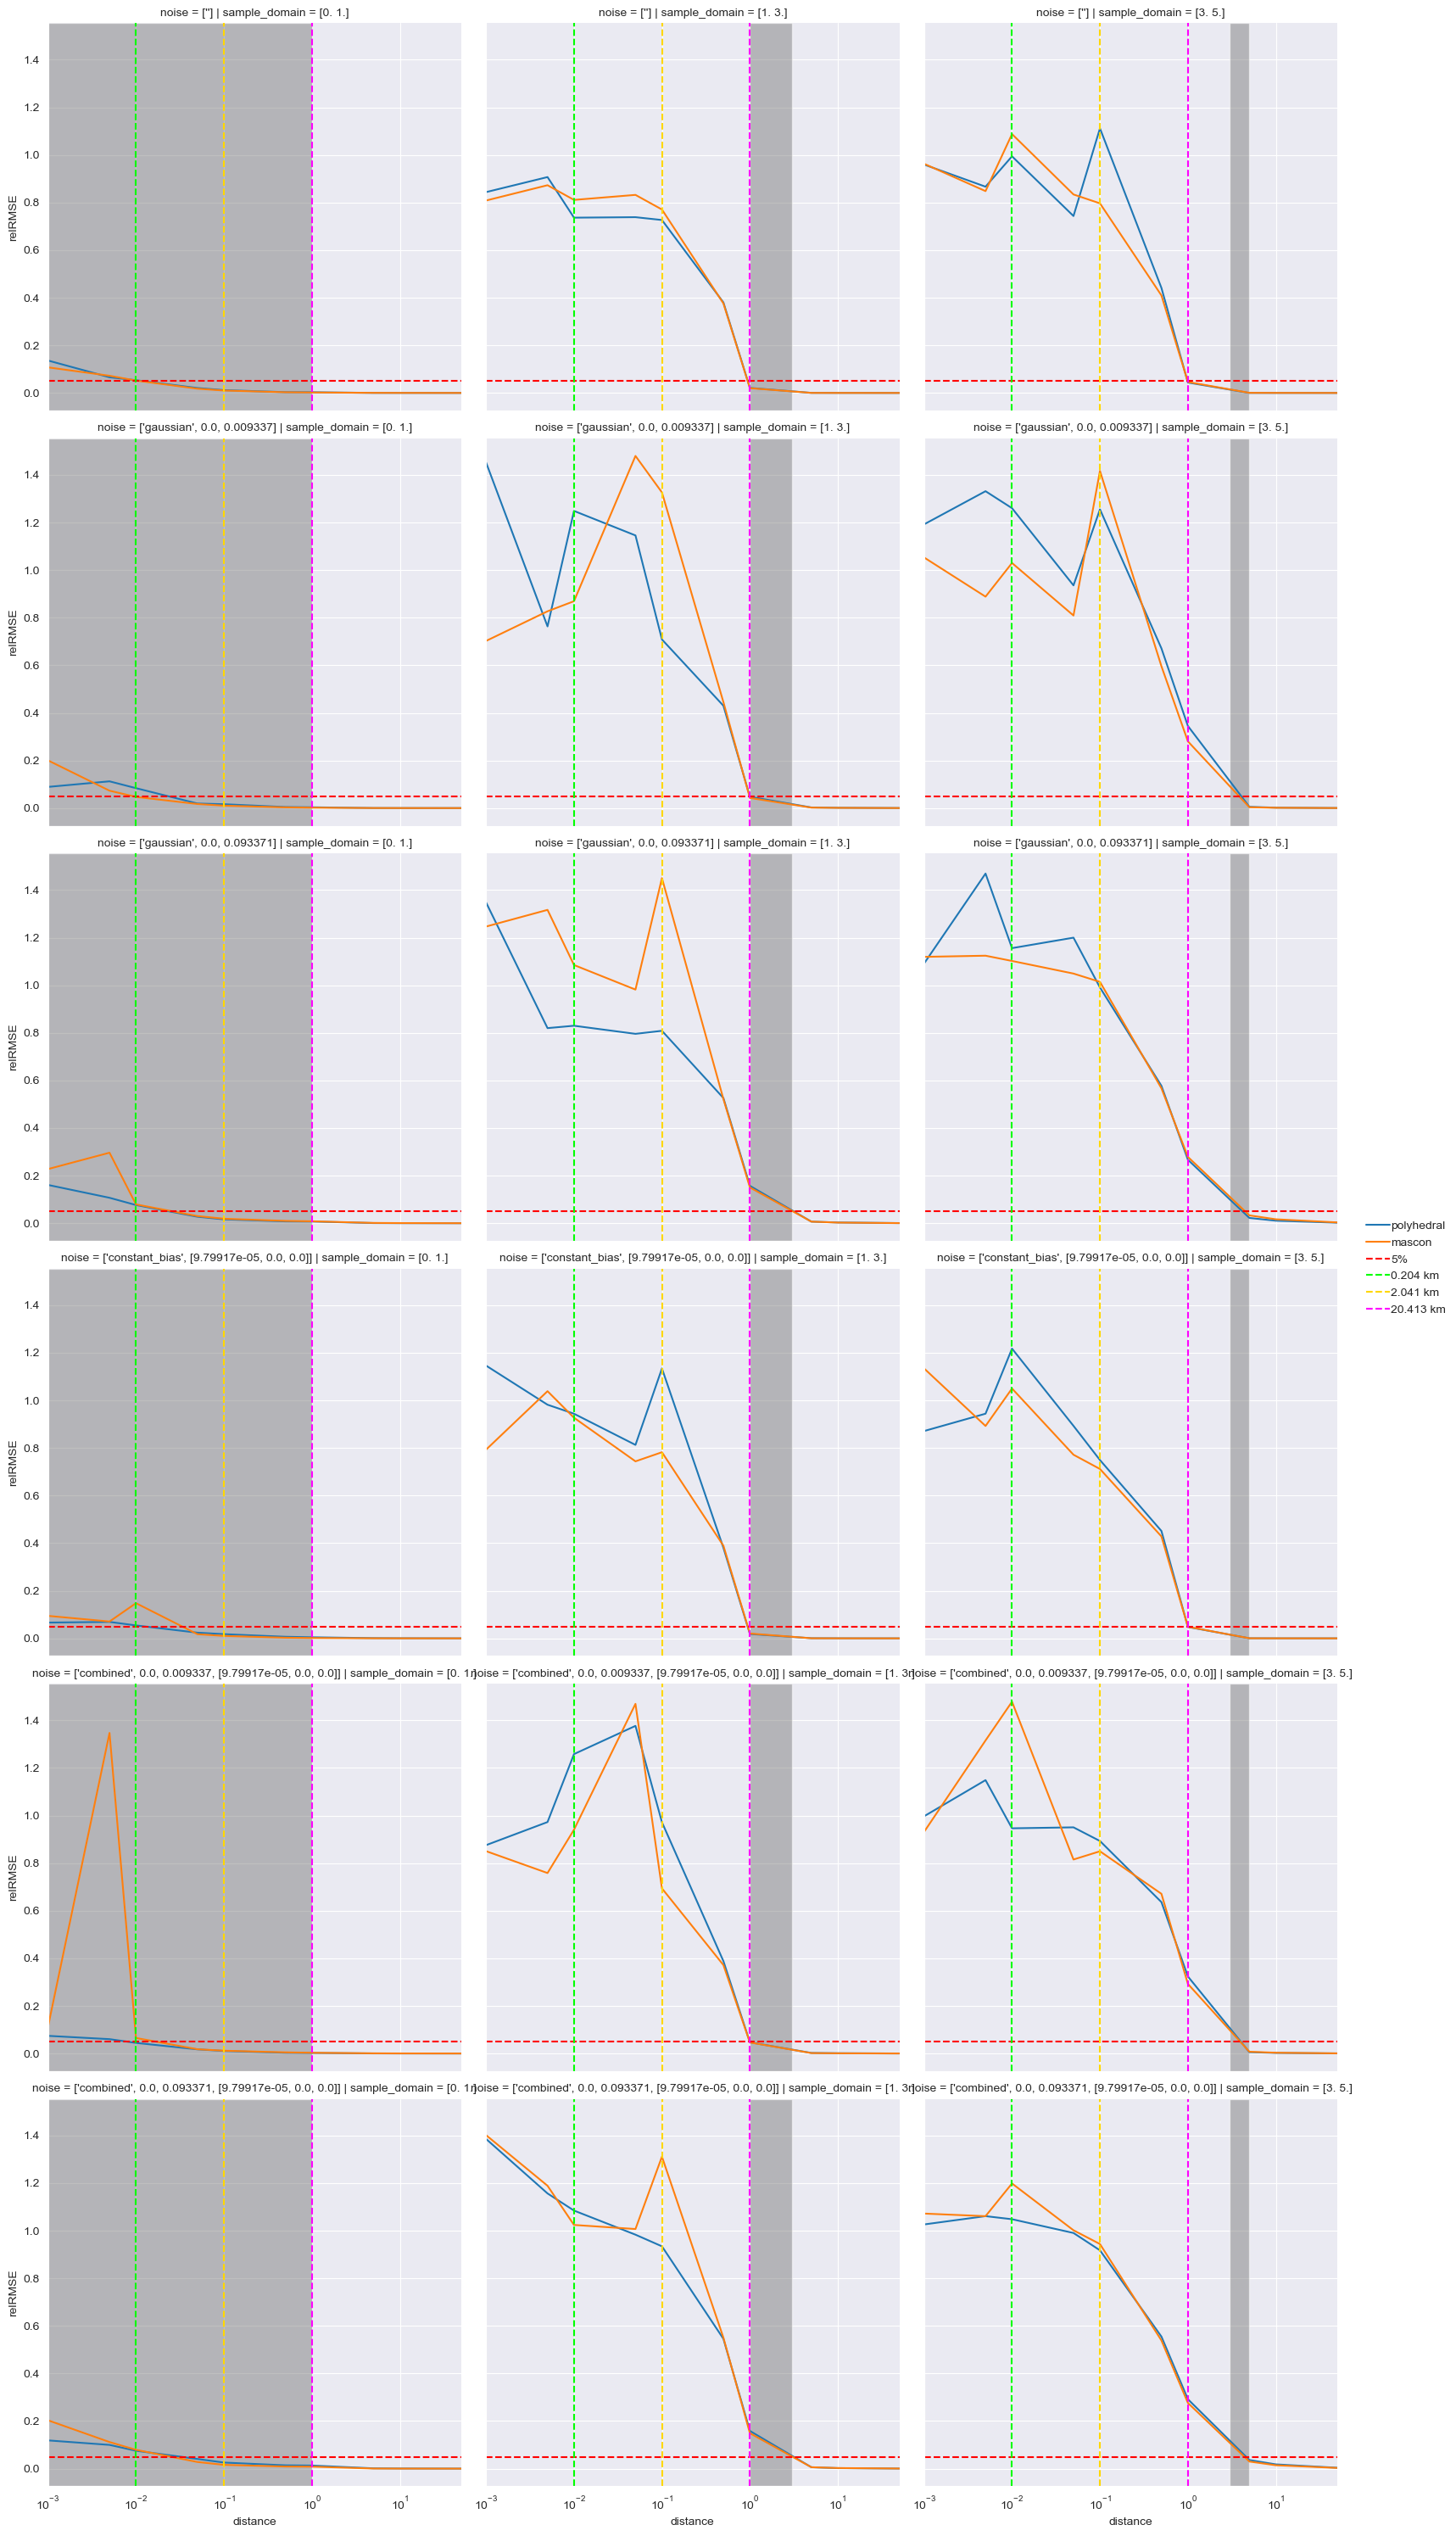

In [14]:
g = sns.relplot(
    data=dfm, kind="line",
    x="distance", y=error_of_interest, col="sample_domain", row="noise",
    hue="ground_truth"
)
g.set(xlim=(0.0, 50.0), xscale='log')
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.01, ls='--', c='lime', label="0.204 km")
g.map(plt.axvline, x=0.1, ls='--', c='gold', label="2.041 km")
g.map(plt.axvline, x=1.0, ls='--', c='fuchsia', label="20.413 km")

for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,1]:
    ax.axvspan(1.0, 3.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,2]:
    ax.axvspan(3.0, 5.0, facecolor='gray', alpha=0.5)

# g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.legend.remove()
g.add_legend(handletextpad=0.1)
g.tight_layout()
save_path = os.path.join(output_directory, f"eros_norm_{error_of_interest}_line.png")
g.savefig(save_path, dpi=300)

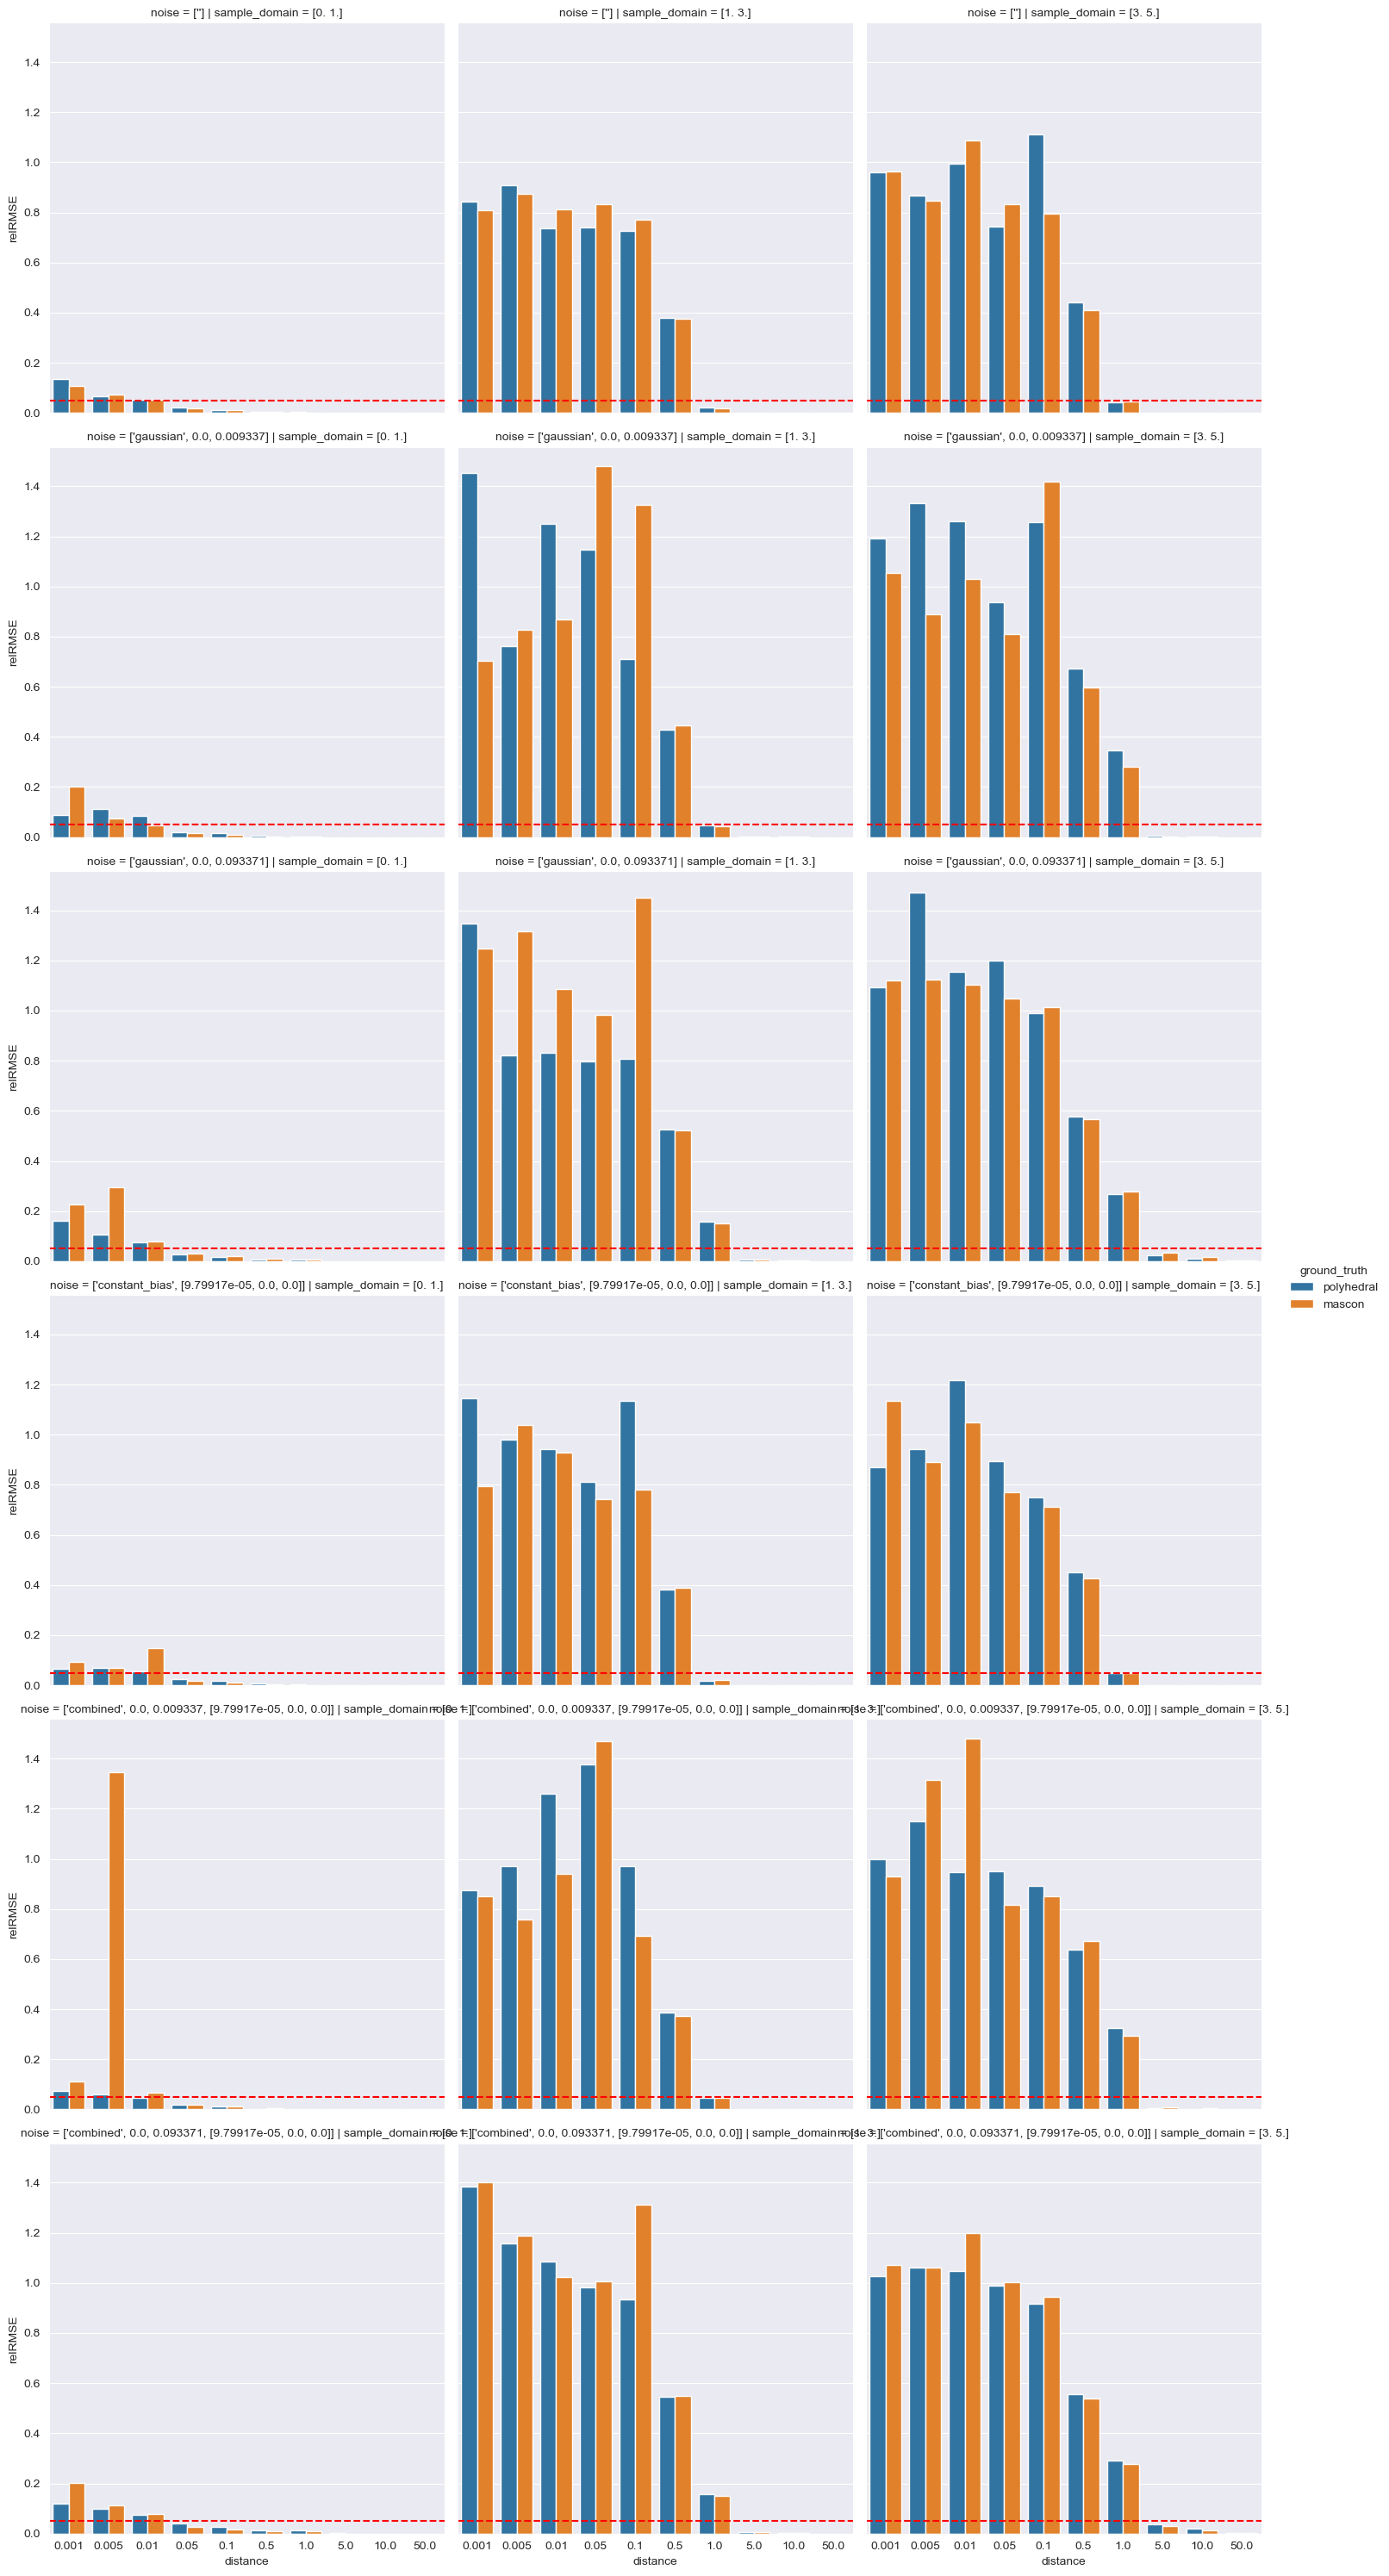

In [12]:
g = sns.catplot(
    data=dfm, kind="bar",
    x="distance", y=error_of_interest, col="sample_domain", row="noise",
    hue="ground_truth"
)
g.map(plt.axhline, y=0.05, ls='--', c='red')
# g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.tight_layout()
save_path = os.path.join(output_directory, f"eros_norm_{error_of_interest}_bar.png")
g.savefig(save_path, dpi=300)